In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import datetime
from matplotlib.pyplot import figure

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

# FORMAT:  use 'x' for 3<=x<=9 (not '0x')
# seasons start in 3 (2003) and end in 21 (2021)

In [ ]:
cd data_set

[Errno 2] No such file or directory: 'data_set'
/Users/Mothas/Desktop/NYC/Columbia/Cours/Spring22/IEORE4523/project/data_set


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [ ]:
def open_df(start_year,end_year):
    year=np.arange(start_year,end_year+1)
    years=[str(0)+str(i) if i<10 else str(i) for i in year]
    list_df=[]
    for i in range(len(years)-1):
    
        delimiter=';' if (years[i]=='03' or years[i]=='04' or years[i]=='14') else ',' 
        file = 'pl' + years[i] + '_' + years[i+1] + '.csv' 
        df = pd.read_csv(file, sep=delimiter) # read file file
        list_df.append(df)
    return list_df

In [ ]:
def leaderboard(start_year,end_year,graph='yes'):
        
    list_df=open_df(start_year,end_year)
    
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
    
    teams=df['HomeTeam'].unique()
    leaderboard={team:0 for team in teams } 
    for i in range(len(df)):
        if df['FTR'][i]=='A':
            leaderboard[df['AwayTeam'][i]]+=3
        elif df['FTR'][i]=='H':
            leaderboard[df['HomeTeam'][i]]+=3
        else:
            leaderboard[df['HomeTeam'][i]]+=1
            leaderboard[df['AwayTeam'][i]]+=1
    
    res=sorted(leaderboard.items(), key=lambda x: x[1], reverse=True)
    
    teams=[i[0] for i in res]
    points=[i[1] for i in res]
    if graph=='yes':
        figure(figsize=(8, 6), dpi=80)
        plt.bar(teams,points)
        plt.xlabel("Teams")
        plt.ylabel("Points")
        plt.title('Total leaderboard from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
    return #res

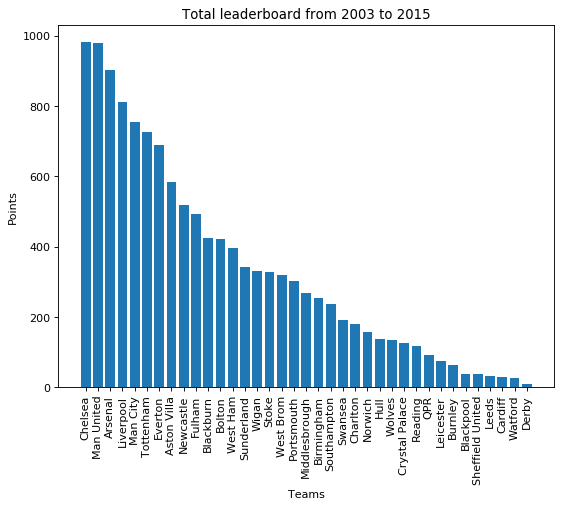

In [ ]:
leaderboard(3,15,graph='yes')

In [ ]:
def point_per_game(start_year,end_year,graph='yes'):
    
    list_df=open_df(start_year,end_year)
    
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
    
    teams=df['HomeTeam'].unique()
    ppg={team:0 for team in teams } 
    games={team:0 for team in teams }
    for i in range(len(df)):
        if df['FTR'][i]=='A':
            ppg[df['AwayTeam'][i]]+=3
        elif df['FTR'][i]=='H':
            ppg[df['HomeTeam'][i]]+=3
        else:
            ppg[df['HomeTeam'][i]]+=1
            ppg[df['AwayTeam'][i]]+=1
            
        games[df['HomeTeam'][i]]+=1
        games[df['AwayTeam'][i]]+=1    
        
    for key,value in ppg.items():
        ppg[key]*=1/games[key]
        
    res=sorted(ppg.items(), key=lambda x: x[1], reverse=True)
    
    teams=[i[0] for i in res]
    ratio=[i[1] for i in res]
    if graph=='yes':
        figure(figsize=(8, 6), dpi=80)
        plt.bar(teams,ratio)
        plt.xlabel("Teams")
        plt.ylabel("ratio")
        plt.title('Point per game per team from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
    return #res

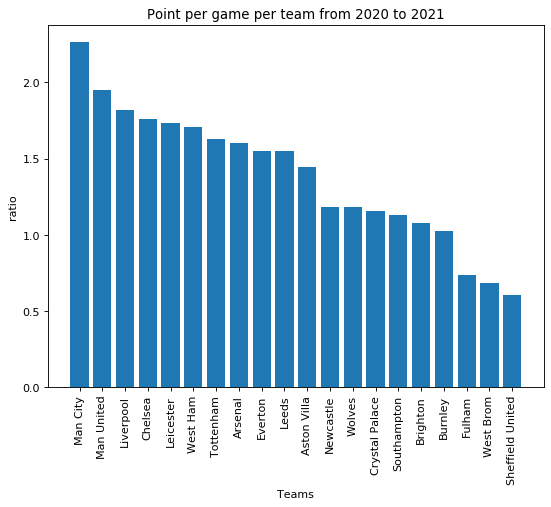

In [ ]:
point_per_game(20,21,graph='yes')

In [ ]:
# number of wins, loss, draw at home, away or both
def type_results(start_year,end_year,graph='yes'):  
    
    list_df=open_df(start_year,end_year)
    
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
    
    # of victory,# of draw,# of defeat]
    df['Away']=np.where(df['FTR']=='A',1,0)
    df['Draw']=np.where(df['FTR']=='D',1,0)
    df['Home']=np.where(df['FTR']=='H',1,0)
    
    fig1=df.groupby('HomeTeam').sum()[['Home','Draw','Away']]
    fig1.sort_values(by='Home',axis=0, ascending=False,inplace=True)
    fig2=df.groupby('AwayTeam').sum()[['Home','Draw','Away']]
    fig2.sort_values(by='Away',axis=0, ascending=False,inplace=True)
    
    if graph=='yes':
    #plt.figure(figsize=(10,4))
        fig1.plot(kind='bar')
        fig1
        plt.xlabel("Teams")
        plt.ylabel("Number of results")
        plt.title('Type of result for teams when playing Home (strongest teams at Home) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        #print(fig1)
    
        #figure(figsize=(50, 50), dpi=80)
        fig2.plot(kind='bar')
        fig2
        plt.xlabel("Teams")
        plt.ylabel("Number of results")
        plt.title('Type of result for teams when playing Away (strongest teams Away) from '+str(2000+start_year)+' to '+str(2000+end_year))
   
        plt.xticks(rotation=90)
        #print(fig2)
    
    return #fig1,fig2

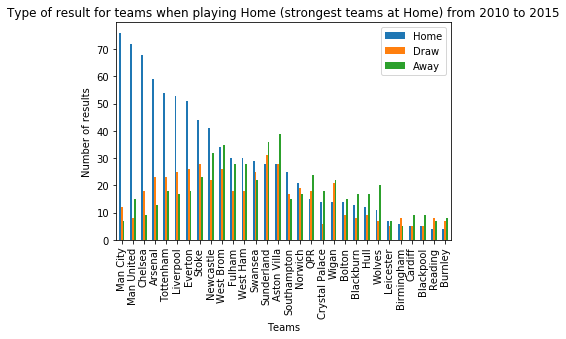

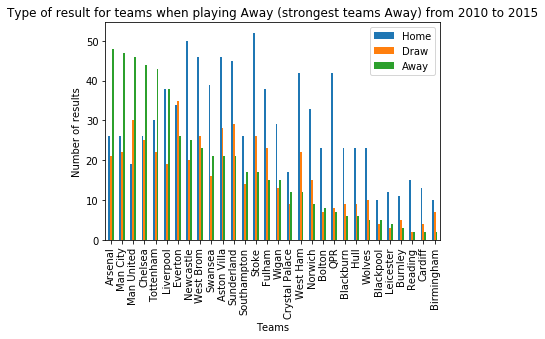

In [ ]:
type_results(10,15,graph='yes')

In [ ]:
def average_leaderboard_pos(start_year,end_year,graph='yes'):
    liste=open_df(start_year,end_year)
    res={} #dictionnary of all teams and a list of their successive rankings in seasons 
    for season in liste: #for all season we use a precedent function that establish ranking and store the ranking of the season in a dictionnary
        season_result=point_per_game(start_year,end_year,graph='no')
        rank=1
        for team in season_result:
            if team[0] not in res:
                res[team[0]]=[rank]
            else:
                res[team[0]].append(rank)
            rank+=1
    for team in res: # We compute the mean ranking for each team and sort them based on that.
        res[team]=np.mean(res[team])
    res_sorted=dict(sorted(res.items(), key=lambda item: item[1]))
    team=[]
    avg_rank=[]
    for key in res_sorted: # We plot the scatter plot
        team.append(key)
        avg_rank.append(res_sorted[key])
    res={team[i]:avg_rank[i] for i in range(len(team))}
    if graph=='yes':
        fig, ax = plt.subplots(figsize=(11, 6))
        ax.scatter(team, avg_rank)
        plt.title('Average ranking for all teams from '+str(2000+start_year)+' to '+str(2000+end_year))
        ax.set_ylabel('Avg_rank')
        ax.set_xlabel('Teams')
        plt.xticks(rotation=90)
        plt.show()
        
    return #res

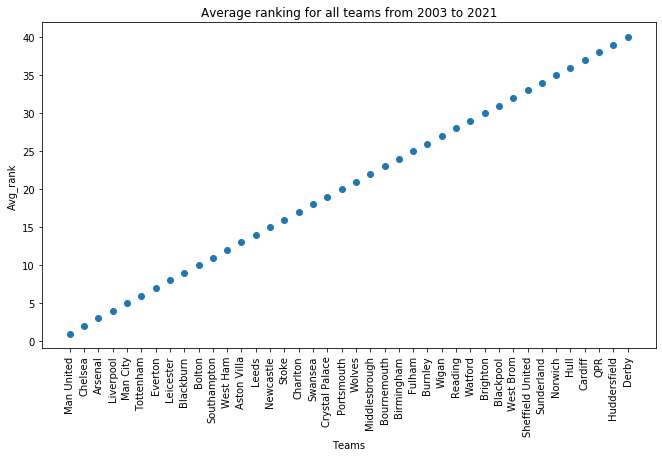

In [ ]:
average_leaderboard_pos(3,21,graph='yes')

In [ ]:
def PL_participation(start_year,end_year,graph='yes'):  
    
    list_df=open_df(start_year,end_year)
    teams_dict={}
    for seasons in list_df:
        teams=seasons['HomeTeam'].unique()
        for team in teams:
            if team in teams_dict:
                teams_dict[team]+=1
            else:
                teams_dict[team]=1
      
    res=sorted(teams_dict.items(), key=lambda x: x[1], reverse=True)
    
    teams=[i[0] for i in res]
    participation=[i[1] for i in res]
    if graph=='yes':
        figure(figsize=(8, 6), dpi=80)
        plt.bar(teams,participation)
        plt.xlabel("Teams")
        plt.ylabel("participation")
        plt.title('Participation of teams in Premier League seasons from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
    return #res

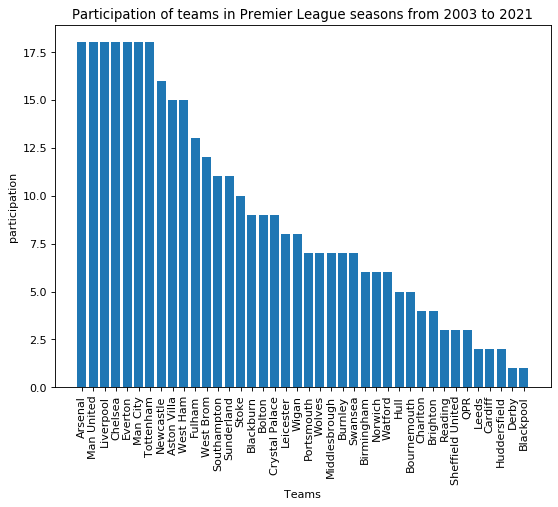

In [ ]:
PL_participation(3,21,graph='yes')

In [ ]:
def average_odds(start_year,end_year):
    list_df=open_df(start_year,end_year)
    df=pd.DataFrame()
    
    for data in list_df:
        if 'AvgH' in data.columns:
            data['Home_Odd']=data['AvgH']
            data['Draw_Odd']=data['AvgD']
            data['Away_Odd']=data['AvgA']
        elif 'BbAvA' in data.columns:
            data['Home_Odd']=data['BbAvH']
            data['Draw_Odd']=data['BbAvD']
            data['Away_Odd']=data['BbAvA']
        else:
            data['Home_Odd']=pd.Series()
            data['Away_Odd']=pd.Series()
            data['Draw_Odd']=pd.Series()
            for i in range(len(data)): 
                data['Home_Odd'][i]=np.nanmean([data['B365H'][i],data['BWH'][i],data['IWH'][i]])
                data['Draw_Odd'][i]=np.nanmean([data['B365D'][i],data['BWD'][i],data['IWD'][i]])
                data['Away_Odd'][i]=np.nanmean([data['B365A'][i],data['BWA'][i],data['IWA'][i]])
                    
        df=df.append(data).reset_index(drop=True)          
    return df

In [ ]:
def average_odd_over_time(start_year,end_year,graph='yes'):
    df=average_odds(start_year,end_year)
    
    fig1=df.groupby('HomeTeam').mean()[['Home_Odd','Draw_Odd','Away_Odd']]
    fig1.sort_values(by='Home_Odd',axis=0,inplace=True)
    fig2=df.groupby('AwayTeam').mean()[['Home_Odd','Draw_Odd','Away_Odd']]
    fig2.sort_values(by='Away_Odd',axis=0,inplace=True)
    
    if graph=='yes':
    #plt.figure(figsize=(10,4))
        fig1.plot(kind='bar')
        fig1
        plt.xlabel("Teams")
        plt.ylabel("Odds")
        plt.title('Mean odds for teams when playing Home (favorite teams at Home) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        #print(fig1)
    
        #figure(figsize=(50, 50), dpi=80)
        fig2.plot(kind='bar')
        fig2
        plt.xlabel("Teams")
        plt.ylabel("Odds")
        plt.title('Mean odds for teams when playing Away (favorite teams Away) from '+str(2000+start_year)+' to '+str(2000+end_year))
   
        plt.xticks(rotation=90)
    return #fig1,fig2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

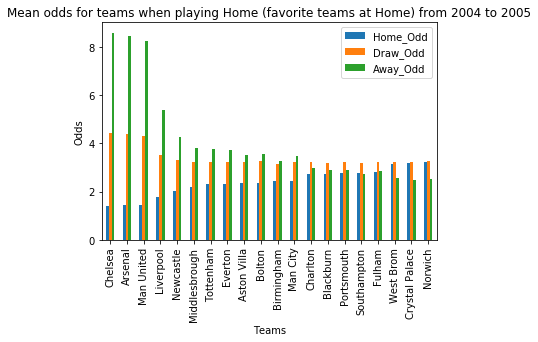

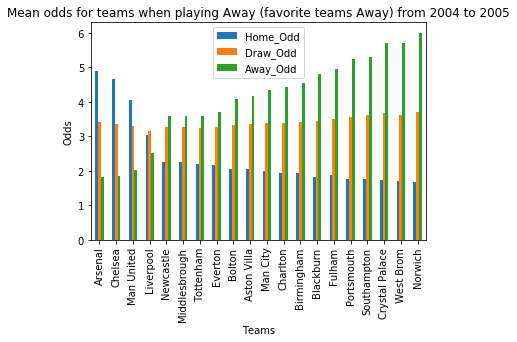

In [ ]:
average_odd_over_time(4,5,graph='yes')

In [ ]:
def average_goal_scored(start_year,end_year,graph='yes'):
    list_df=open_df(start_year,end_year)
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
        
        
    fig1=df.groupby('HomeTeam').mean()[['FTHG']]#.reset_index()
    fig1.sort_values(by='FTHG',axis=0, ascending=False,inplace=True)
    fig2=df.groupby('AwayTeam').mean()[['FTAG']]#.reset_index() 
    fig2.sort_values(by='FTAG',axis=0, ascending=False,inplace=True)
    fig3=pd.DataFrame(index=fig1.index)
    fig3['FTG']=(fig1['FTHG']+fig2['FTAG'])/2
    fig3.sort_values(by='FTG',axis=0, ascending=False,inplace=True)
    
    if graph=='yes':
    #plt.figure(figsize=(10,4))
        fig1.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals scored per teams when playing Home (favorite teams at Home) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        #print(fig1)
    
        #figure(figsize=(50, 50), dpi=80)
        fig2.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals scored per teams when playing Away (favorite teams Away) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        
        fig3.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals scored per teams (home and away) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
    return #fig3,fig1,fig2

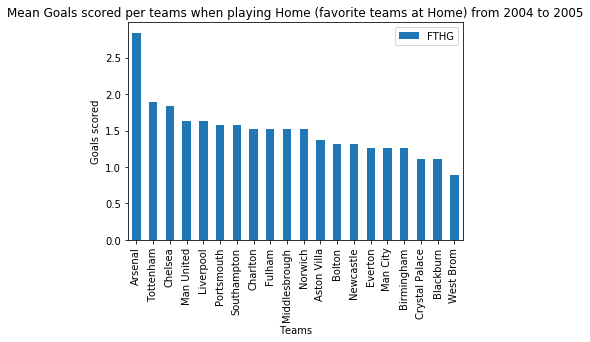

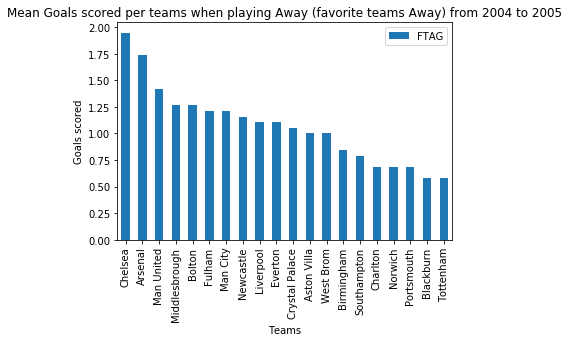

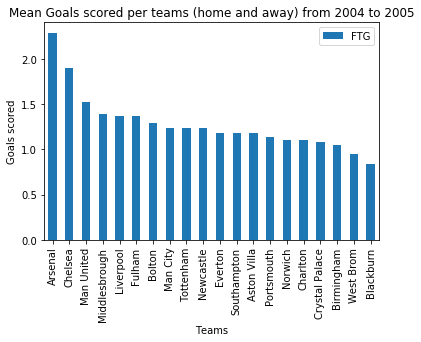

In [ ]:
average_goal_scored(4,5,graph='yes')

In [ ]:
def average_goal_conceded(start_year,end_year,graph='yes'):
    list_df=open_df(start_year,end_year)
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
        
    fig1=df.groupby('HomeTeam').mean()[['FTAG']]#.reset_index()
    fig1.sort_values(by='FTAG',axis=0, ascending=False,inplace=True)
    fig2=df.groupby('AwayTeam').mean()[['FTHG']]#.reset_index() 
    fig2.sort_values(by='FTHG',axis=0, ascending=False,inplace=True)
    fig3=pd.DataFrame(index=fig1.index)
    fig3['FTG']=(fig1['FTAG']+fig2['FTHG'])/2
    fig3.sort_values(by='FTG',axis=0, ascending=False,inplace=True)
    
    if graph=='yes':
    #plt.figure(figsize=(10,4))
        fig1.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals conceded per teams when playing Home (favorite teams at Home) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        #print(fig1)
    
        #figure(figsize=(50, 50), dpi=80)
        fig2.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals conceded per teams when playing Away (favorite teams Away) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
        
        fig3.plot(kind='bar')
        plt.xlabel("Teams")
        plt.ylabel("Goals scored")
        plt.title('Mean Goals conceded per teams (home and away) from '+str(2000+start_year)+' to '+str(2000+end_year))
        plt.xticks(rotation=90)
    return #fig3,fig1,fig2

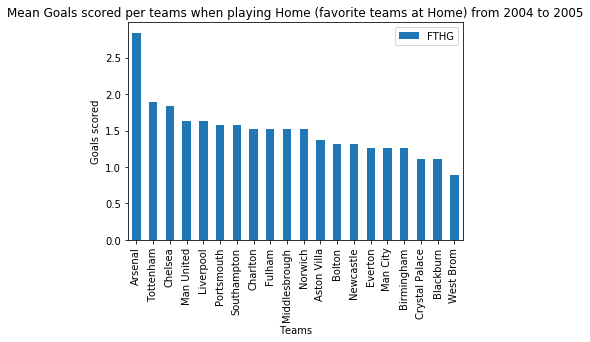

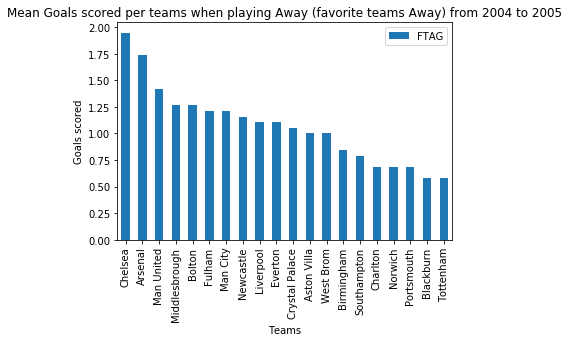

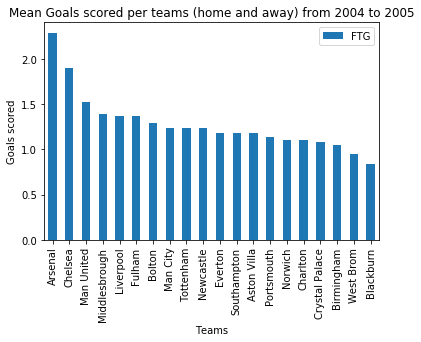

In [ ]:
average_goal_scored(4,5,graph='yes')

## Bookmakers and betting strategy

In [ ]:
def bookmaker_performance(start_year,end_year,rounding,min_samplesize,bookmaker):
    #this function only works for home victories
    #rounding determines how you want to round your probabilities
    #samplesize correspond to the minimum number of matches with given probabilities you want to introduce the sample into the study
    #bookmaker is the column name corresponding to the bookmaker you want to study
    list_df=open_df(start_year,end_year)
    df=pd.DataFrame()
    for data in list_df:
        df=df.append(data).reset_index(drop=True)
    df2=df[df[bookmaker].notna()] #We remove all matches for which we don't have information on the bookmaker corresponding odd
    
    df2["H_win_prob"]=round(1/df2[bookmaker],rounding) #Probability of home victory for each match rounded
    Probas=df2['H_win_prob'].unique()
    History={prob:[0,0] for prob in Probas} 
    for i in range(len(df2)): #For all probabilities count the number of matches, and the number of time Home victory happened
        History[df2["H_win_prob"][i]][0]+=1
        if df2["FTR"][i]=="H":
            History[df2["H_win_prob"][i]][1]+=1
    Outcomes=[]
    final_probas=[]
    for proba in Probas:
        if History[proba][0]>min_samplesize: ### we only take probabilities for which we have a large enough sample size
            Outcomes.append(History[proba][1]/History[proba][0])
            final_probas.append(proba)
    ### Plotting and linear regression ###
    a,b=np.polyfit(final_probas, Outcomes, 1)
    tendance=[a*x+b for x in final_probas]
    fig, ax = plt.subplots(figsize=(11, 6))
    ax.scatter(final_probas,Outcomes,label="bookmaker performance")
    ax.plot(final_probas,final_probas,color="r",label="1 correlation (x=y)")
    ax.plot(final_probas,tendance,color="b",label="bookmaker")
    ax.legend()
    ax.set_ylabel('Probability of home victory occuring')
    ax.set_xlabel('Estimated probability by bookmaker (1/odds)')
    
    plt.title('probability of event vs bookmakers ('+str(bookmaker)+') "probability" from '+str(2000+start_year)+' to '
              +str(2000+end_year)+'with rounding ='+str(rounding))
    plt.show()
    return

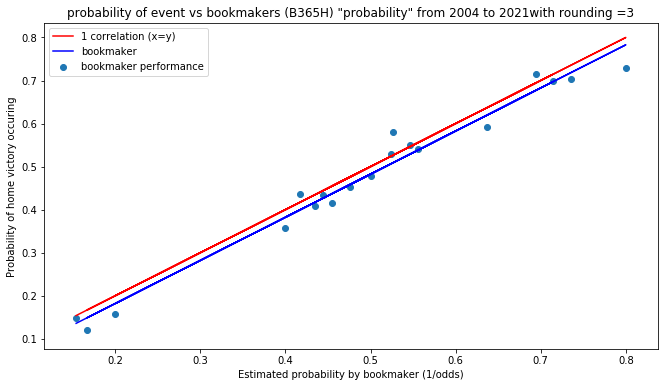

In [ ]:
bookmaker_performance(4,21,3,100,"B365H")

In [ ]:
def betting_strategy(start_date,end_date,treshold,amount):
    #amount: fixed amount places on each bet
    #treshold: how much the max odd must be superior to the avg odd for you to place a bet
    Balance=[0]
    df=average_odds(start_date,end_date)
    
    for i in range(len(df)): #For each match look for an opportunity by comparing possible max odds with avg oods
        max_odds_H=max(df["B365H"][i],df["BWH"][i],df["IWH"][i])
        max_odds_D=max(df["B365D"][i],df["BWD"][i],df["IWD"][i])
        max_odds_A=max(df["B365A"][i],df["BWA"][i],df["IWA"][i])
        
        if max_odds_H>=df["Home_Odd"][i]+treshold: 
            if df['FTR'][i]=="H":
                Balance.append(Balance[-1]+amount*(max_odds_H-1)) #adjust balance depending on bet outcome
            else:
                Balance.append(Balance[-1]-amount)
        elif max_odds_D>=df["Draw_Odd"][i]+treshold:
            if df['FTR'][i]=="D":
                Balance.append(Balance[-1]+amount*(max_odds_D-1))
            else:
                Balance.append(Balance[-1]-amount)
        elif max_odds_A>=df["Away_Odd"][i]+treshold:
            if df['FTR'][i]=="A":
                Balance.append(Balance[-1]+amount*(max_odds_A-1))
            else:
                Balance.append(Balance[-1]-amount)
    return Balance    

In [ ]:
treshholds=np.linspace(-10,10,100)
Balances=[]
c=0
for t in treshholds:
    c+=1
    #print(c)
    Balances.append(betting_strategy(20,21,t,50)[-1])
Balances[0]
opt_tresh=treshholds[np.argmax(Balances)]
print(opt_tresh)

0.10101010101010033


In [ ]:
profit=betting_strategy(20,21,opt_tresh,50)
print(' Profit generated with "max strategy" :'+str(profit[-1])+'$ for threshold ='+str(round(opt_tresh,3))) 

 Profit generated with "max strategy" :2305.5$ for threshold =0.101
